<a href="https://colab.research.google.com/github/nikitaagarwal1992/Data-science/blob/main/Copy_of_clustering_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/student_grades.csv')

In [ ]:
data.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [ ]:
data.isnull().sum()

,0
math,0
science,0
cs,0
band,0
english,0
history,0
spanish,0
physed,0


In [ ]:
data.drop('student_id', axis = 1, inplace = True)

In [ ]:
data.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


<Axes: >

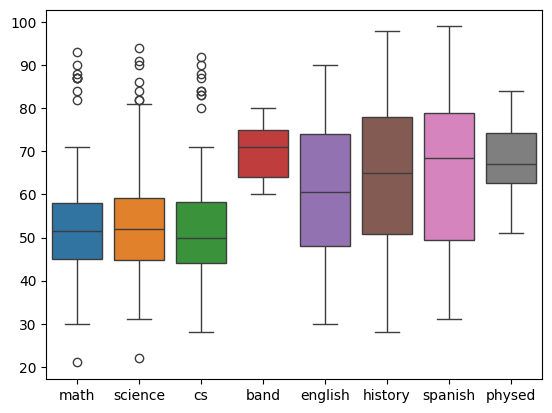

In [ ]:
sns.boxplot(data = data)

There are no null values. Will leave the outliers in the dataset as it can be a cluster

In [ ]:
data_centered = data - data.mean()

In [ ]:
data_centered.head()

,math,science,cs,band,english,history,spanish,physed
0,-7.05,-5.22,-2.75,3.96,-26.97,-19.6,-26.56,5.39
1,12.95,11.78,12.25,-4.04,13.03,16.4,9.44,-4.61
2,1.95,-0.22,-2.75,5.96,10.03,8.4,10.44,3.39
3,-0.05,3.78,0.25,9.96,16.03,13.4,19.44,14.39
4,1.95,8.78,5.25,-3.04,21.03,13.4,12.44,-7.61


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(data_centered)

PCA(n_components=2)

In [ ]:
pca.explained_variance_ratio_

array([0.81844937, 0.09778153])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9162308999794647

In [ ]:
pca_comp = pca.components_

In [ ]:
pca_comp

array([[ 0.34433892,  0.34662586,  0.32733313, -0.00417335,  0.45552196,
         0.46095972,  0.48354746,  0.01773586],
       [ 0.45069884,  0.44923506,  0.47433583,  0.096715  , -0.33260806,
        -0.31949261, -0.35110809,  0.15725648]])

In [ ]:
# Interpret the above
# Each row is PCA Component  (PCA1, PCA2)
# Each column is a column from dataset.

# PC1 is x axis : Higher values on x axis are students with higher eng, his, spanish -->
# PC2 is y axis: Higher valueson y axis are students with better STEM grades

In [ ]:
pca_comp_df = pd.DataFrame(pca_comp, columns = data_centered.columns)

In [ ]:
pca_comp_df

,math,science,cs,band,english,history,spanish,physed
0,0.344339,0.346626,0.327333,-0.004173,0.455522,0.460960,0.483547,0.017736
1,0.450699,0.449235,0.474336,0.096715,-0.332608,-0.319493,-0.351108,0.157256


<Axes: >

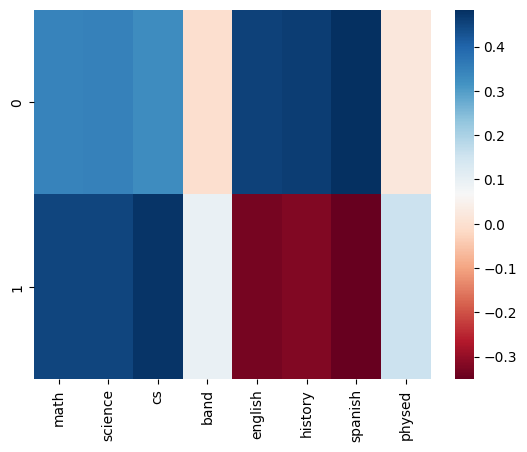

In [ ]:
sns.heatmap(pca_comp_df, cmap = 'RdBu')

In [ ]:
# PC1 (x-axis): higher --> better grades
# PC2 (y-axis) : higher --> better stem grades, lower <-- better humanitarian grades

In [ ]:
pc_transform = pca.transform(data_centered)

In [ ]:
pc_transform = pd.DataFrame(pc_transform, columns = ['PC1', 'PC2'])

In [ ]:
pc_transform.head()

,PC1,PC2
0,-39.221331,18.961672
1,30.547249,2.935450
2,13.219471,-9.100237
3,24.467554,-11.418090
4,27.082869,-9.821059


Text(0, 0.5, '<-- Better Humanitarian   Better in Stem -->')

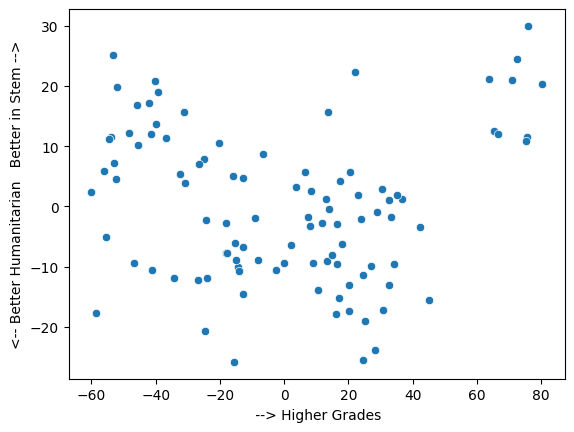

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = pc_transform)
plt.xlabel(' --> Higher Grades')
plt.ylabel('<-- Better Humanitarian   Better in Stem -->')

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(data_centered)
  inertia.append(kmeans.inertia_)

In [ ]:
inertia_series = pd.Series(inertia,index = range(2,15))

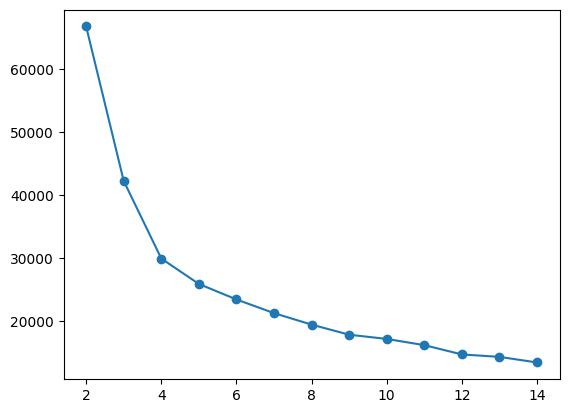

In [ ]:
inertia_series.plot(marker='o');

In [ ]:
kmeans4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans4.fit(data_centered)

KMeans(n_clusters=4, random_state=42)

In [ ]:
labels = kmeans4.labels_
labels = pd.Series(labels)

In [ ]:
kmeans4.cluster_centers_

array([[  4.7304878 ,   5.1702439 ,   4.07926829,   0.91121951,
         11.71292683,  11.74146341,  12.17170732,   1.36560976],
       [ -8.28076923,  -7.83538462,  -7.67307692,  -1.57846154,
         -5.54692308,  -5.86923077,  -5.25230769,  -2.57153846],
       [ 34.17222222,  32.22444444,  32.91666667,  -1.70666667,
         26.03      ,  26.95555556,  28.44      ,   0.94555556],
       [-11.925     , -12.42833333, -11.        ,   0.79333333,
        -23.76166667, -23.80833333, -25.76833333,   0.09833333]])

In [ ]:
kmeans4.labels_

array([3, 0, 0, 0, 0, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 3, 0, 1, 1, 1, 3, 1, 2, 0, 3, 2, 3, 1, 3, 1,
       0, 1, 3, 0, 3, 0, 0, 1, 0, 3, 0, 1, 3, 0, 3, 1, 2, 3, 1, 0, 3, 2,
       0, 3, 1, 0, 0, 0, 0, 1, 1, 3, 3, 0, 1, 2, 3, 1, 0, 0, 0, 0, 0, 1,
       1, 2, 1, 1, 2, 0, 0, 2, 3, 3, 3, 0], dtype=int32)

In [ ]:
data

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60
...,...,...,...,...,...,...,...,...
95,87,82,87,61,81,85,90,65
96,45,45,43,73,46,50,44,69
97,30,33,36,64,41,46,47,67
98,46,47,41,71,48,44,50,63


In [ ]:
kmeans4.cluster_centers_

array([[  4.7304878 ,   5.1702439 ,   4.07926829,   0.91121951,
         11.71292683,  11.74146341,  12.17170732,   1.36560976],
       [ -8.28076923,  -7.83538462,  -7.67307692,  -1.57846154,
         -5.54692308,  -5.86923077,  -5.25230769,  -2.57153846],
       [ 34.17222222,  32.22444444,  32.91666667,  -1.70666667,
         26.03      ,  26.95555556,  28.44      ,   0.94555556],
       [-11.925     , -12.42833333, -11.        ,   0.79333333,
        -23.76166667, -23.80833333, -25.76833333,   0.09833333]])

In [ ]:
cluster_centers = pd.DataFrame(kmeans4.cluster_centers_, columns = data_centered.columns) # Removed the extra cluster.

In [ ]:
data.columns

Index(['math', 'science', 'cs', 'band', 'english', 'history', 'spanish',
       'physed'],
      dtype='object')

In [ ]:
cluster_centers

,math,science,cs,band,english,history,spanish,physed
0,4.730488,5.170244,4.079268,0.911220,11.712927,11.741463,12.171707,1.365610
1,-8.280769,-7.835385,-7.673077,-1.578462,-5.546923,-5.869231,-5.252308,-2.571538
2,34.172222,32.224444,32.916667,-1.706667,26.030000,26.955556,28.440000,0.945556
3,-11.925000,-12.428333,-11.000000,0.793333,-23.761667,-23.808333,-25.768333,0.098333


<Axes: >

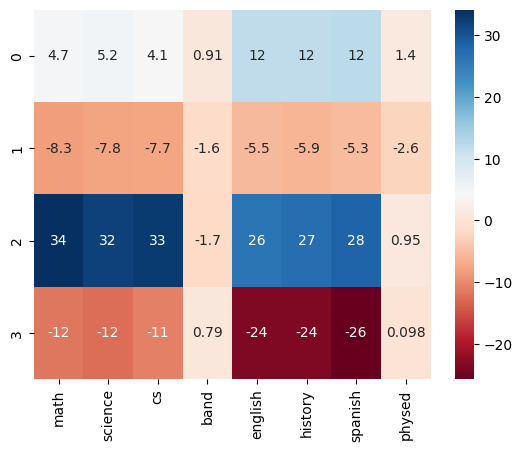

In [ ]:
sns.heatmap(cluster_centers, cmap = 'RdBu', annot= True)

In [ ]:
# cluster 1: Better in Humanities than Stem
# cluster 2 : Average Grades
# cluster 3: Excelling Grades
# cluster 4: Poor Grades

Text(0, 0.5, '<-- Better band/pysh   Better in Stem -->')

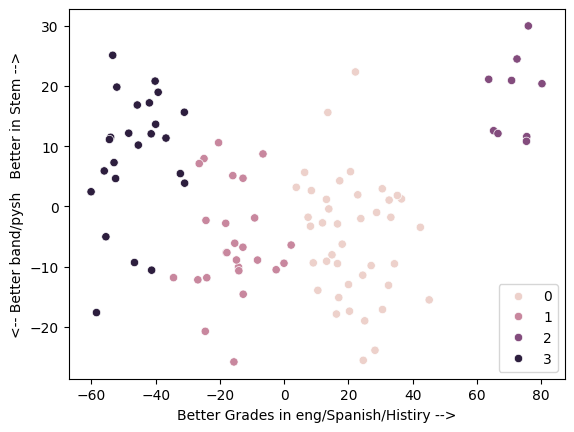

In [ ]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = pc_transform, hue = kmeans4.labels_)
plt.xlabel('Better Grades in eng/Spanish/Histiry -->')
plt.ylabel('<-- Better band/pysh   Better in Stem -->')

In [ ]:
# t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_transform = tsne.fit_transform(data_centered)

In [ ]:
tsne_transform = pd.DataFrame(tsne_transform, columns = ['TSNE1', 'TSNE2'])

In [ ]:
tsne_transform

,TSNE1,TSNE2
0,-4.712030,5.245308
1,4.011413,-2.883559
2,1.260615,-2.139878
3,1.629475,-3.820282
4,3.638814,-2.134594
...,...,...
95,5.419157,-4.738970
96,-4.119741,3.966794
97,-6.071017,3.156056
98,-4.259854,3.508507


In [ ]:
# TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state= 42)
tsne_transform = tsne.fit_transform(data_centered)

In [ ]:
tsne_transform

array([[-4.71203   ,  5.245308  ],
       [ 4.011413  , -2.8835585 ],
       [ 1.2606148 , -2.1398776 ],
       [ 1.6294746 , -3.8202822 ],
       [ 3.638814  , -2.1345937 ],
       [-6.451214  ,  5.0247006 ],
       [ 2.0305283 , -0.03465416],
       [-2.5352948 ,  1.1879805 ],
       [-4.966365  ,  2.2618804 ],
       [ 5.385756  , -4.6450944 ],
       [-5.583703  ,  5.8427935 ],
       [ 1.5206671 , -1.6815838 ],
       [ 2.9917707 , -0.88204324],
       [ 1.1357526 , -2.682627  ],
       [ 1.0480872 , -0.6039757 ],
       [-6.0984406 ,  5.3362784 ],
       [ 0.6910491 , -2.7684553 ],
       [ 3.6556761 , -1.3976666 ],
       [ 2.8232248 , -3.946135  ],
       [-6.1855364 ,  4.748316  ],
       [ 2.6498165 , -3.8147554 ],
       [ 2.2326598 , -2.421505  ],
       [-2.8920565 ,  1.1416496 ],
       [ 1.1349549 , -3.1132188 ],
       [ 4.5501375 , -2.7782588 ],
       [-1.8581443 ,  1.940388  ],
       [-2.643211  ,  0.38191527],
       [-4.278677  ,  1.2806301 ],
       [ 3.866808  ,

In [ ]:
df_tsne = pd.DataFrame(tsne_transform, columns = ['TSNE1', 'TSNE2'])

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

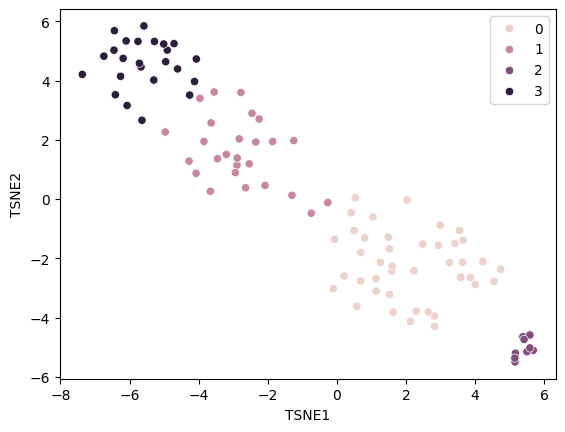

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = kmeans4.labels_)


In [ ]:
# cluster 0: Better in Humanities than Stem
# cluster 1 : Average Grades
# cluster 2: Excelling Grades
# cluster 3: Poor Grades

In [ ]:
kmeans_tsne = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne.fit(tsne_transform)

KMeans(n_clusters=4, random_state=42)

In [ ]:
kmeans_tsne.labels_

array([1, 3, 0, 0, 3, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 3, 0,
       2, 0, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 1, 2, 3, 0, 1, 3, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 3, 1, 2, 3, 1, 2, 0, 1, 3,
       0, 1, 2, 3, 0, 0, 0, 2, 2, 1, 1, 3, 2, 3, 1, 2, 0, 3, 0, 0, 0, 2,
       0, 3, 1, 0, 3, 3, 0, 3, 1, 1, 1, 0], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(data_centered, kmeans4.labels_)

0.3980631440990661

In [ ]:
# pc_transform
# tsne_transform

In [ ]:
# import dbscan from sklearn
from sklearn.cluster import DBSCAN

In [ ]:
# Applying DBSCAN on centered data, PCA and TSNE trasnformed data

In [ ]:
dbscan = DBSCAN(eps = 1.5, min_samples = 5)
dbscan.fit(data_centered)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
dbscan = DBSCAN(eps = 1.5, min_samples = 5)
dbscan.fit(data)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
dbscan = DBSCAN(eps = 1.5, min_samples = 5)
dbscan.fit(pc_transform)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(tsne_transform)

dbscan.labels_

array([ 1, -1, -1, -1, -1, -1, -1,  0, -1,  2, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1,  2, -1, -1,  2, -1,  0, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1,  2, -1, -1, -1,  1,  2, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  2, -1, -1,  2, -1, -1,  2, -1, -1, -1, -1])

In [ ]:
# number of clusters in labels, ignoring noise points
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

3

In [ ]:
# silhouette score of the model
from sklearn.metrics import silhouette_score

silhouette_score(tsne_transform, dbscan.labels_, metric='euclidean', sample_size=None)

-0.19724908

In [ ]:
# loop through many values of epsilon and min_samples
import numpy as np

results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1, 2, .1)
min_samples_values = np.arange(2, 10, 1)

# loop through the combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(tsne_transform)
        labels = dbscan.labels_

        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)

        # calculate the silhouette score
        if n_clusters > 1:  # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(tsne_transform, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None

        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                "Number of Noise Points", "Silhouette Score"])
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,1,98,NaN
1,0.1,3,0,100,NaN
2,0.1,4,0,100,NaN
3,0.1,5,0,100,NaN
4,0.1,6,0,100,NaN


In [ ]:
# view the silhouette scores (higher is better)
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
119,1.5,9,3,0,0.564108
101,1.3,7,3,0,0.564108
126,1.6,8,3,0,0.564108
125,1.6,7,3,0,0.564108
124,1.6,6,3,0,0.564108
...,...,...,...,...,...
45,0.6,7,1,91,NaN
46,0.6,8,1,91,NaN
47,0.6,9,1,91,NaN
54,0.7,8,1,91,NaN


In [ ]:
# view only the top result for each silhouette score
(dbscan_results.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
119,1.5,9,3,0,0.564108
135,1.7,9,3,0,0.560286
84,1.1,6,4,4,0.468347
94,1.2,8,4,6,0.465115
85,1.1,7,4,6,0.463064


In [ ]:
dbscan_v2 = DBSCAN(eps = 1.5, min_samples = 6)
dbscan_v2.fit(tsne_transform)

dbscan_v2.labels_

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1])

In [ ]:
# view the value counts
from collections import Counter
Counter(dbscan_v2.labels_)

Counter({0: 48, 1: 43, 2: 9})

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

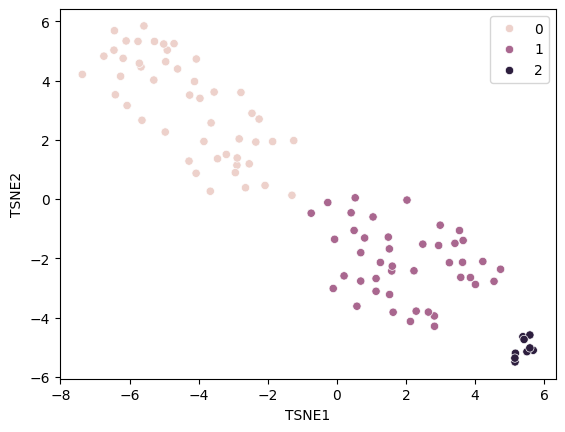

In [ ]:
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = df_tsne, hue = dbscan_v2.labels_)

In [ ]:
# Compare the 2 Models:

# KMeans
# DBSCAN

# Compare Number of Clusters
# Compare Silhouette Score

In [ ]:
# kmeans4.labels_

print(Counter(kmeans4.labels_))
print(silhouette_score(tsne_transform, kmeans4.labels_))

Counter({0: 41, 1: 26, 3: 24, 2: 9})
0.51561636


In [ ]:
# dbscan_v2.labels_

print(Counter(dbscan_v2.labels_))
print(silhouette_score(tsne_transform, dbscan_v2.labels_))

Counter({0: 48, 1: 43, 2: 9})
0.5641079


K means and DB scan both clustered the data on TSNE transformed data better

Based on TSNE Transformed data, K means has 4 clusters and DBSCAN has 3 clusters

Clusters 0 anf Cluster 2 seem to be the same for both models
Cluster 1 from DBSCAN is split Cluster 1 amd 3 in K means

Silhoutte score is slightly higher in DBSCAN model than KMeans

In [ ]:
# cluster 0: Better in Humanities than Stem
# cluster 1 : Average Grades
# cluster 2: Excelling Grades
# cluster 3: Poor Grades

If the final user wants to distinguist further in Avg Students and Poor Students, Kmeans can be used and if that granularity is not needed then DBSCAN is a better model.

:For Kmeans found the number of clusters and labelled them in categories. PCA and TSNE to viaualize.

For DBSCAN only TSNE transformed data were forming clusters.